In [64]:
import os

from oandapyV20 import API
import oandapyV20.endpoints.instruments as instruments
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as pdr
from mpl_finance import candlestick_ohlc


# APIの設定
accountID = "000-000-0000000-000"

api = API(access_token=os.environ['OANDA_ACCESS_TOKEN'])

average_count = 20
data_count = 5000

num_count = int(data_count / average_count)

# 5分間隔で5000データ
params = {
    "count": data_count,
    "granularity": "M1"
}

# APIへ過去データをリクエスト
r = instruments.InstrumentsCandles(instrument="USD_JPY", params=params)
api.request(r)

# row_dataとしてリストへ変換
raw_data = []

columns = ['time', 'volume', 'open_value', 'high_value', 'low_value', 'close_value']

# 全リスト取得
for raw in r.response['candles']:
  raw_data.append([raw['time'], raw['volume'], raw['mid']['o'], raw['mid']['h'], raw['mid']['l'], raw['mid']['c']])

df = pd.DataFrame(data=raw_data, columns=columns)

ax = plt.subplot()
candlestick2_ohlc(ax, df['open_value'], df['high_value'], df['low_value'], df['close_value'], width=0.4, alpha=1)
plt.axis("on")
plt.figure(figsize=(100,100))
plt.savefig('stock.png', bbox_inches='tight', pad_inches=0.0)

SyntaxError: invalid syntax (<ipython-input-64-653deba1e048>, line 45)

                  High         Low        Open       Close    Volume  \
Date                                                                   
2019-08-16  207.160004  203.839996  204.279999  206.500000  27620400   
2019-08-19  212.729996  210.029999  210.619995  210.350006  24413600   
2019-08-20  213.350006  210.320007  210.880005  210.360001  26884300   
2019-08-21  213.649994  211.600006  212.990005  212.639999  21535400   
2019-08-22  214.440002  210.750000  213.190002  212.460007  22253700   
2019-08-23  212.050003  201.000000  209.429993  202.639999  46818000   
2019-08-26  207.190002  205.059998  205.860001  206.490005  26043600   
2019-08-27  208.550003  203.529999  207.860001  204.160004  25873300   
2019-08-28  205.720001  203.320007  204.100006  205.529999  15938800   
2019-08-29  209.320007  206.660004  208.500000  209.009995  20990500   
2019-08-30  210.449997  207.199997  210.160004  208.740005  21143400   
2019-09-03  206.979996  204.220001  206.429993  205.699997  2002

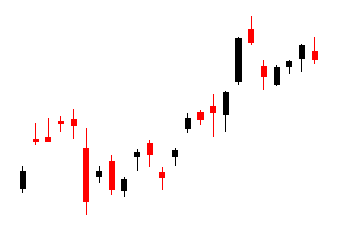

In [54]:
import pandas_datareader as pdr
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

from mpl_finance import candlestick2_ohlc
df = pdr.get_data_yahoo('AAPL', '2019-08-16', '2019-09-19')
print(df)
ax = plt.subplot()
candlestick2_ohlc(ax, df['Open'], df['High'], df['Low'], df['Close'], width=0.4, alpha=1)
plt.axis("off")
plt.savefig('stock.png', bbox_inches='tight', pad_inches=0.0)